In [1]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
USE_TEX = True
SAVE_EPS = False
SAVE_PNG = True
DPI=400

# FONT_SIZE = 26
SMALL_SIZE = 20
MEDIUM_SIZE = 26
BIGGER_SIZE = 30

SCALE = 3
FIG_SIZE = (4 * SCALE, 3 * SCALE)

In [3]:
plt.rc('font', family = 'serif', weight='bold', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
if USE_TEX:
    plt.rc('text', usetex=True)
    
plt.rc('font', )

In [4]:
names = ['MLE', 'GeoMLE', 'MIND', 'DANCo', 'Hein', 'ESS', 'PCA']

In [5]:
cmap = {'DANCo':'indianred',
        'ESS': 'sienna',
        'MIND': 'forestgreen',
        'MIND_ML': 'forestgreen',
        'MLE': 'steelblue',
        'PCA': 'darkcyan',
        'GeoMLE': 'darkorange',
        'Hein': 'mediumpurple'  }


In [6]:
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

def bf(s):
    return r'\textbf{' + s + '}'

### Decribe algorithm

In [7]:
from sklearn.linear_model import Ridge

In [8]:
data = np.load('result/exp_new.npy')[1:, :]

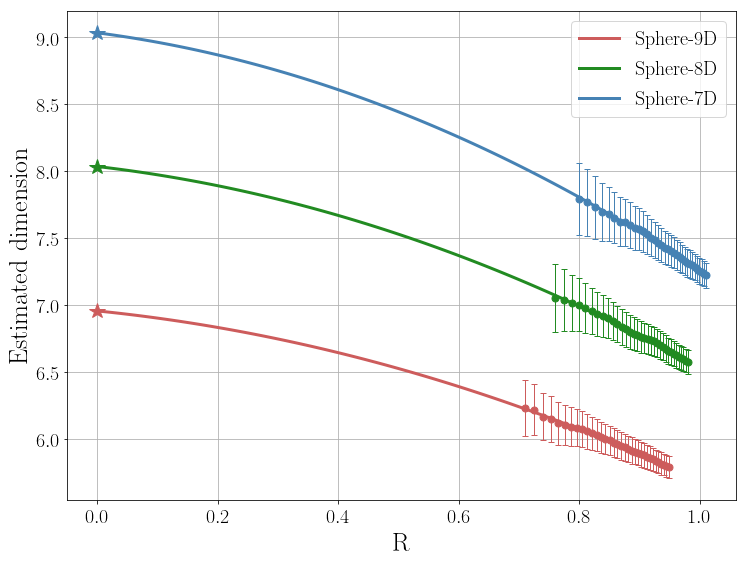

In [9]:
alpha_poly = (1, 2)
alpha_reg = 5e-3

cm = ['indianred', 'forestgreen', 'steelblue', 'darkmagenta']

f, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

for i, (x, y, w) in enumerate(data):
    X = np.array([x ** i for i in alpha_poly]).T
    xlin = np.linspace(0, x.max(), 100)
    Xlin = np.array([xlin ** i for i in alpha_poly]).T
    lm = Ridge(alpha=alpha_reg)
    lm.fit(X, y, w**-1)
    plt.errorbar(x, y, w * 0.1 , fmt='o', color=cm[i], capsize=3, markersize=7, capthick=1, linewidth=1)
    plt.plot(xlin, lm.predict(Xlin), color=cm[i], linewidth=3, label='Sphere-{}D'.format(9 - i))
    plt.plot(xlin[0], lm.predict(Xlin)[0], '*', color=cm[i], ms=16)


ax.set_title('')
ax.set_ylabel(r"Estimated dimension")
ax.set_xlabel(r"R")
ax.legend()
ax.grid()

if SAVE_EPS: plt.savefig('img/Explain.eps')
if SAVE_PNG: plt.savefig('img/Explain.png', dpi=DPI)

### Dolan-More

In [10]:
df = pd.read_csv('result/result_dm.csv')

In [11]:
df.groupby(['Dataset', 'Num', 'Dim', 'RealDim']).mean()

MLE     GeoMLE  MIND  DANCo  \
Dataset        Num    Dim  RealDim                                      
Affine         1000.0 5.0  5.0       4.491511   4.996216   4.9    5.0   
                      10.0 10.0      8.069145   9.604724   8.0    9.7   
                      20.0 20.0     14.097987  19.062312  14.6   19.5   
Affine_3to5    1000.0 5.0  3.0       2.826288   3.112742   3.0    3.0   
Cubic          1000.0 5.0  3.0       3.065541   3.000431   3.0    3.0   
                      35.0 30.0     19.710092  29.923105  20.6   31.4   
                      90.0 70.0     34.229893  73.385525  36.0   74.3   
Helicoid       1000.0 3.0  2.0       2.078854   2.094113   2.0    2.0   
                      13.0 2.0       2.084280   2.137017   2.0    2.0   
Helix1d        1000.0 3.0  1.0       1.001435   1.198853   1.0    1.0   
                      13.0 1.0       1.006109   1.404808   1.0    1.0   
Helix2d        1000.0 3.0  2.0       2.745800   2.234214   3.0    3.0   
                      13.0 2.0       2.725517   2.420028   2.9    3.0   
Moebius        1000.0 3.0  2.0       1.983149   1.691168   2.0    2.0   
Nonlinear      1000.0 8.0  4.0       4.071886   3.237013   4.0    5.6   
                      36.0 6.0       6.640394   6.502650   6.1    8.3   
                      64.0 8.0       9.228826  10.410987   9.0   10.5   
                      72.0 12.0     13.486356  17.242131  13.4   17.6   
Nonlinear_4to6 1000.0 6.0  4.0       3.812984   3.998419   4.0    5.1   
Norm           1000.0 20.0 20.0     15.120939  20.000000  15.8   19.7   
                      50.0 20.0     15.057757  22.136810  15.9   21.6   
                           50.0     27.144883  50.000000  28.8   48.3   
                      70.0 50.0     27.122251  53.701652  28.5   50.3   
Paraboloid     1000.0 12.0 3.0       2.837123   2.955642   3.0    3.0   
                      21.0 6.0       4.750757   5.788459   5.0    6.8   
                      30.0 9.0       5.927102   8.681944   6.0    8.0   
                      39.0 12.0      6.603519  11.576834   7.0    8.4   
                      48.0 15.0      6.922586  13.892194   7.2    8.6   
Roll           1000.0 3.0  2.0       1.939035   2.344505   2.0    2.0   
                      13.0 2.0       1.941786   2.750410   2.0    2.0   
Scurve         1000.0 3.0  2.0       1.936679   1.994727   2.0    2.0   
                      13.0 2.0       1.951704   2.010138   2.0    2.0   
Sphere         1000.0 5.0  3.0       2.978172   2.981705   3.0    3.0   
                      10.0 5.0       4.845034   4.906196   5.0    6.0   
                      15.0 10.0      8.893865  10.091635   9.0   11.1   
                      35.0 30.0     20.547390  31.749768  21.4   30.8   
                      55.0 50.0     28.715958  50.975415  30.1   50.5   
                      75.0 70.0     35.796473  70.759385  37.6   69.7   
Spiral         1000.0 3.0  1.0       1.786417   1.562488   1.0    1.0   
                      13.0 1.0       1.767828   1.435331   1.0    1.0   
Uniform        1000.0 10.0 5.0       4.447358   4.616430   4.5    5.0   
                      15.0 10.0      8.027130   8.842079   8.0    9.8   
                      35.0 30.0     19.097766  28.878570  20.1   30.0   
                      55.0 50.0     27.383034  50.490068  28.4   50.9   
                      75.0 70.0     33.888778  72.354151  35.6   72.3   

                                          ESS   PCA         CD  Hein  
Dataset        Num    Dim  RealDim                                    
Affine         1000.0 5.0  5.0       4.969559   5.0   4.813223   4.9  
                      10.0 10.0      9.987233  10.0   8.619081   8.9  
                      20.0 20.0     19.751898  20.0  14.822720  15.2  
Affine_3to5    1000.0 5.0  3.0       2.609786   3.0   2.990866   3.0  
Cubic          1000.0 5.0  3.0       3.967678   4.0   3.136728   3.0  
                      35.0 30.0     31.271725  31.0  20.649040  21.8  
                      90.0 70.0     71.726

In [12]:
df_int = df.copy()
df_int = df_int.round()

errors = df_int[names].sub(df_int['RealDim'], axis=0).values

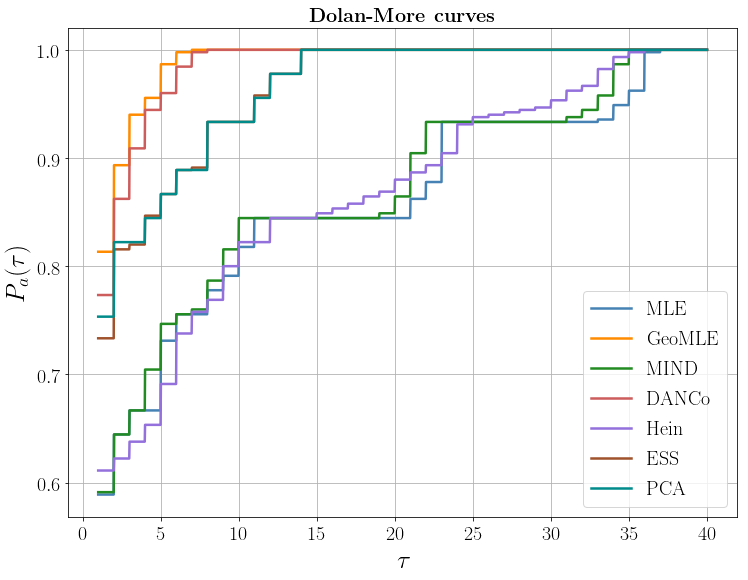

In [13]:
f, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
nsteps = 2001
max_tau = 40
errors_total = abs(errors)
errors_total = np.max([errors_total, np.ones_like(errors_total)], axis=0)


taus = np.linspace(1, max_tau, nsteps)        
rhos = np.zeros((nsteps, len(names)))
for cnt, tau in enumerate(taus):
    rhos[cnt] = np.sum(errors_total <= tau, axis=0)

for i, name in enumerate(names):
    ax.plot(taus, rhos[:,i]/errors_total.shape[0], linewidth=2.5, c = cmap[name], label=name)

ax.set_title(bf('Dolan-More curves'))
ax.set_ylabel(r'$P_a(\tau)$')
ax.set_xlabel(r'$\tau$')
ax.legend()
ax.grid()

if SAVE_EPS: plt.savefig('img/DMcurve.eps')
if SAVE_PNG: plt.savefig('img/DMcurve.png', dpi=DPI)

### Dependancy

In [14]:
file = 'result/result_sphere.csv'

df = pd.read_csv(file)
dfm = df.groupby(['Dataset', 'Num', 'Dim', 'RealDim']).mean().reset_index()
dfs = df.groupby(['Dataset', 'Num', 'Dim', 'RealDim']).std().reset_index()

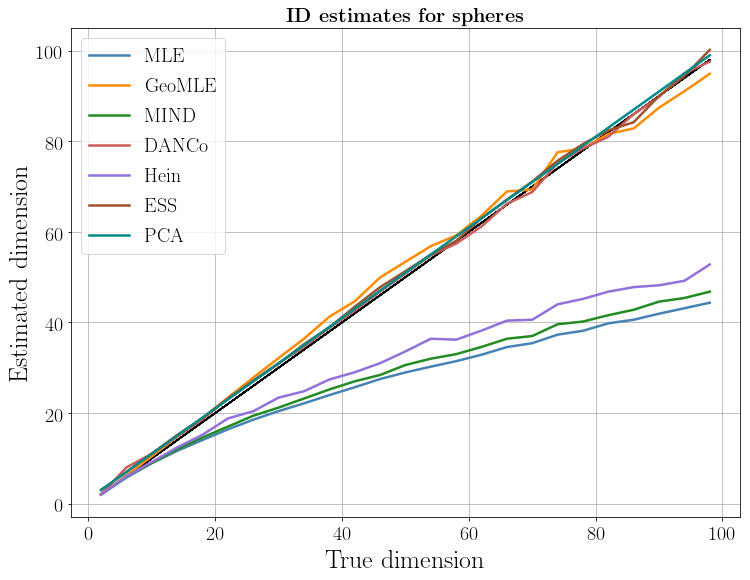

In [15]:
f, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

ax.plot(df['RealDim'].values, df['RealDim'].values, 'k--')
for name in names:
    ax.plot(dfm['RealDim'], dfm[name], label=name, linewidth=2.5, c=cmap[name])
#     ax.fill_between(dfm['RealDim'], dfm[name] - dfs[name], dfm[name] + dfs[name], color=cmap[name], alpha=0.1)
    
ax.grid()
ax.legend()
ax.set_title(bf('ID estimates for spheres'))
ax.set_xlabel(r'True dimension')
ax.set_ylabel(r'Estimated dimension')

if SAVE_EPS: plt.savefig('img/Sphere.eps')
if SAVE_PNG: plt.savefig('img/Sphere.png', dpi=DPI)

### Noise

In [16]:
mpe = pd.read_csv('result/result_noise_mpe.csv')
std = pd.read_csv('result/result_noise_std.csv')

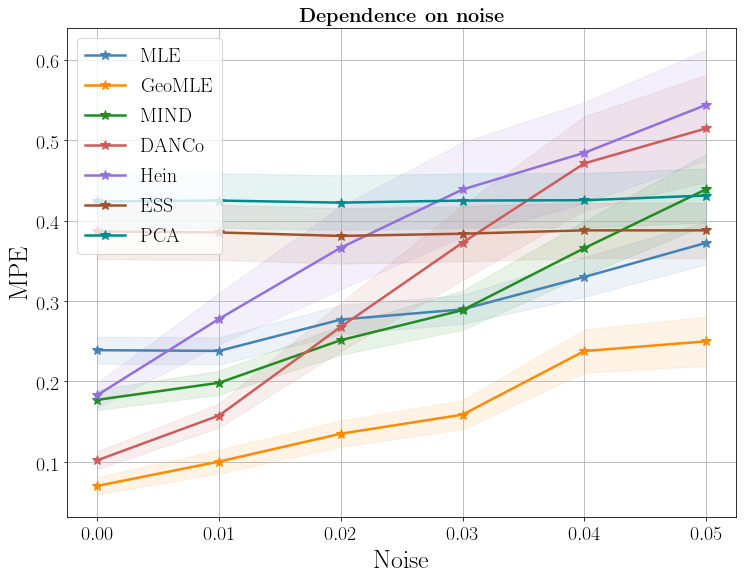

In [17]:
f, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

for name in names:
    ax.plot(mpe['noise'], mpe[name], '-*', ms=10, label=name, c=cmap[name], linewidth=2.5)
    ax.fill_between(mpe['noise'], mpe[name] - std[name], mpe[name] + std[name], alpha=0.1, color=cmap[name])

ax.grid()
ax.legend(loc=2)
ax.set_title(bf('Dependence on noise'))
ax.set_xlabel(r'Noise')
ax.set_ylabel(r'MPE')

# plt.savefig('Noise.eps')
if SAVE_PNG: plt.savefig('img/Noise.png', dpi=DPI)

## Dependance of N

In [18]:
df = pd.read_csv('result/result_num.csv')

In [19]:
dfr = df.round()

In [20]:
dfr[names] = abs(dfr[names].sub(dfr['RealDim'], axis=0)).mul(dfr['RealDim']**-1, axis=0)

mpe = dfr.groupby('Num')[names].mean()
n_steps = list(mpe.index)
mpe = mpe.values
std = dfr.groupby('Num')[names].std().values / dfr.groupby('Num')[names].count().values

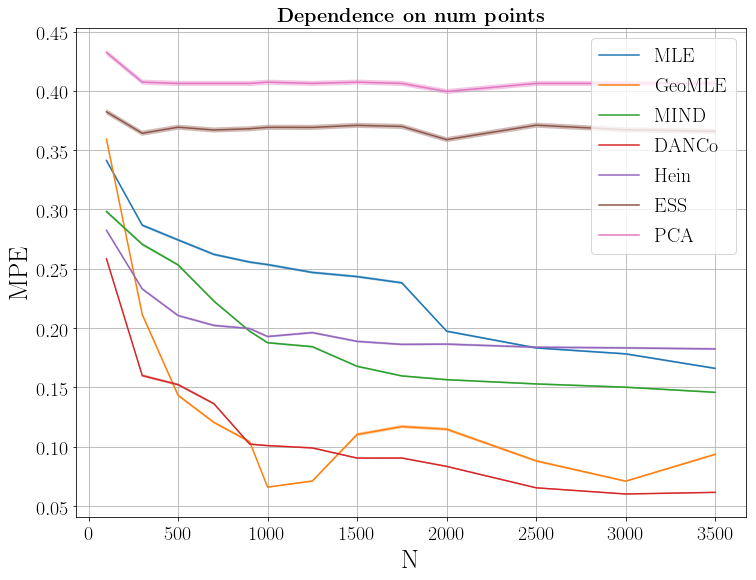

In [21]:
f, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

for mpe_i, std_i, name in zip(mpe.T, std.T, names):
    ax.plot(n_steps, mpe_i, label=name)
    ax.fill_between(n_steps, mpe_i-std_i, mpe_i+std_i, alpha=0.4)
    
ax.grid()
ax.legend()
ax.set_title(bf('Dependence on num points'))
ax.set_xlabel(r'N')
ax.set_ylabel(r'MPE')

# plt.savefig('img/Nsteps.eps')
if SAVE_PNG: plt.savefig('img/Nsteps.png', dpi=DPI)